## Importing Required Packages:

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz
from sklearn.model_selection import cross_val_score

## Importing The Dataset:

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

## Data Preprocessing
- Pass = 1 (True) if G3 >= 10
- Pass = 0 otherwise

In [3]:
#join two datasets
df = pd.concat([X,y], axis="columns")
df.sample(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
626,MS,F,18,R,GT3,T,4,4,other,teacher,...,3,2,2,4,2,5,0,7,5,0
621,MS,F,17,R,GT3,T,1,2,other,services,...,3,2,2,1,2,3,0,13,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
380,GP,F,17,U,GT3,T,4,4,teacher,services,...,5,4,4,1,3,4,0,13,12,13
398,GP,F,18,U,GT3,T,2,3,at_home,other,...,4,3,3,1,2,3,0,11,12,14
103,GP,F,15,U,GT3,T,3,2,services,other,...,4,3,5,1,1,2,16,11,10,10
514,MS,F,16,U,GT3,T,3,2,services,at_home,...,3,1,3,1,4,3,2,7,6,7
250,GP,M,17,U,LE3,T,2,2,other,other,...,4,4,2,5,5,4,0,16,16,16
84,GP,F,15,U,GT3,T,1,1,other,other,...,4,3,2,2,3,4,2,13,12,12
578,MS,M,17,U,GT3,T,3,3,health,other,...,4,5,4,2,3,3,4,8,9,10


In [4]:
df["pass"] = df.apply(lambda row: 1 if (row["G3"]) >= 10 else 0, axis=1)
df = df.drop(["G1","G2","G3"], axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,pass
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,0.845917
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,0.361307
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,1.000000


In [7]:
#one-hot encoding
df = pd.get_dummies(df, columns=['school', 'sex','address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic'], dtype='int')

In [8]:
df.sample(20)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
261,17,2,1,3,2,0,2,1,1,1,...,0,1,0,1,0,1,1,0,1,0
71,15,4,2,1,4,0,3,3,3,1,...,1,0,0,1,0,1,0,1,1,0
412,18,4,2,1,2,0,4,2,2,1,...,0,1,0,1,0,1,0,1,1,0
259,17,1,1,1,3,0,4,3,2,1,...,0,1,0,1,0,1,0,1,0,1
127,19,0,1,1,2,2,3,4,2,1,...,1,0,1,0,1,0,1,0,1,0
442,15,4,1,1,2,0,5,3,4,1,...,0,1,0,1,0,1,0,1,1,0
208,16,2,3,2,1,0,5,3,3,1,...,1,0,0,1,0,1,0,1,1,0
491,19,1,1,2,2,1,1,1,4,4,...,1,0,0,1,0,1,0,1,0,1
643,18,4,4,3,1,0,4,4,3,2,...,0,1,0,1,0,1,0,1,0,1
373,17,2,2,1,3,0,3,3,2,2,...,0,1,0,1,0,1,0,1,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                649 non-null    int64
 1   Medu               649 non-null    int64
 2   Fedu               649 non-null    int64
 3   traveltime         649 non-null    int64
 4   studytime          649 non-null    int64
 5   failures           649 non-null    int64
 6   famrel             649 non-null    int64
 7   freetime           649 non-null    int64
 8   goout              649 non-null    int64
 9   Dalc               649 non-null    int64
 10  Walc               649 non-null    int64
 11  health             649 non-null    int64
 12  absences           649 non-null    int64
 13  pass               649 non-null    int64
 14  school_GP          649 non-null    int64
 15  school_MS          649 non-null    int64
 16  sex_F              649 non-null    int64
 17  sex_M           

## Splitting Data to Training, Testing and Validation:
There are 649 record in this dataset, thus:
- Training: 70% (455)
- Testing: 15% (97)
- Validating: 15% (97)

In [10]:
#shuffle rows
df = df.sample(frac=1, random_state=42)

df_train = df[:455]
df_test = df[455:552]
df_valid = df[552:]

df_train_features = df_train.drop(["pass"], axis=1)
df_train_labels = df_train["pass"]

df_test_features = df_test.drop(["pass"], axis=1)
df_test_labels = df_test["pass"]

df_valid_features = df_valid.drop(["pass"], axis=1)
df_valid_labels = df_valid["pass"]

df_features = df.drop(["pass"], axis=1) 
df_labels = df["pass"]

## Training the Model

In [ ]:
t = tree.DecisionTreeClassifier(criterion="entropy")
t = t.fit(df_train_features, df_train_labels)

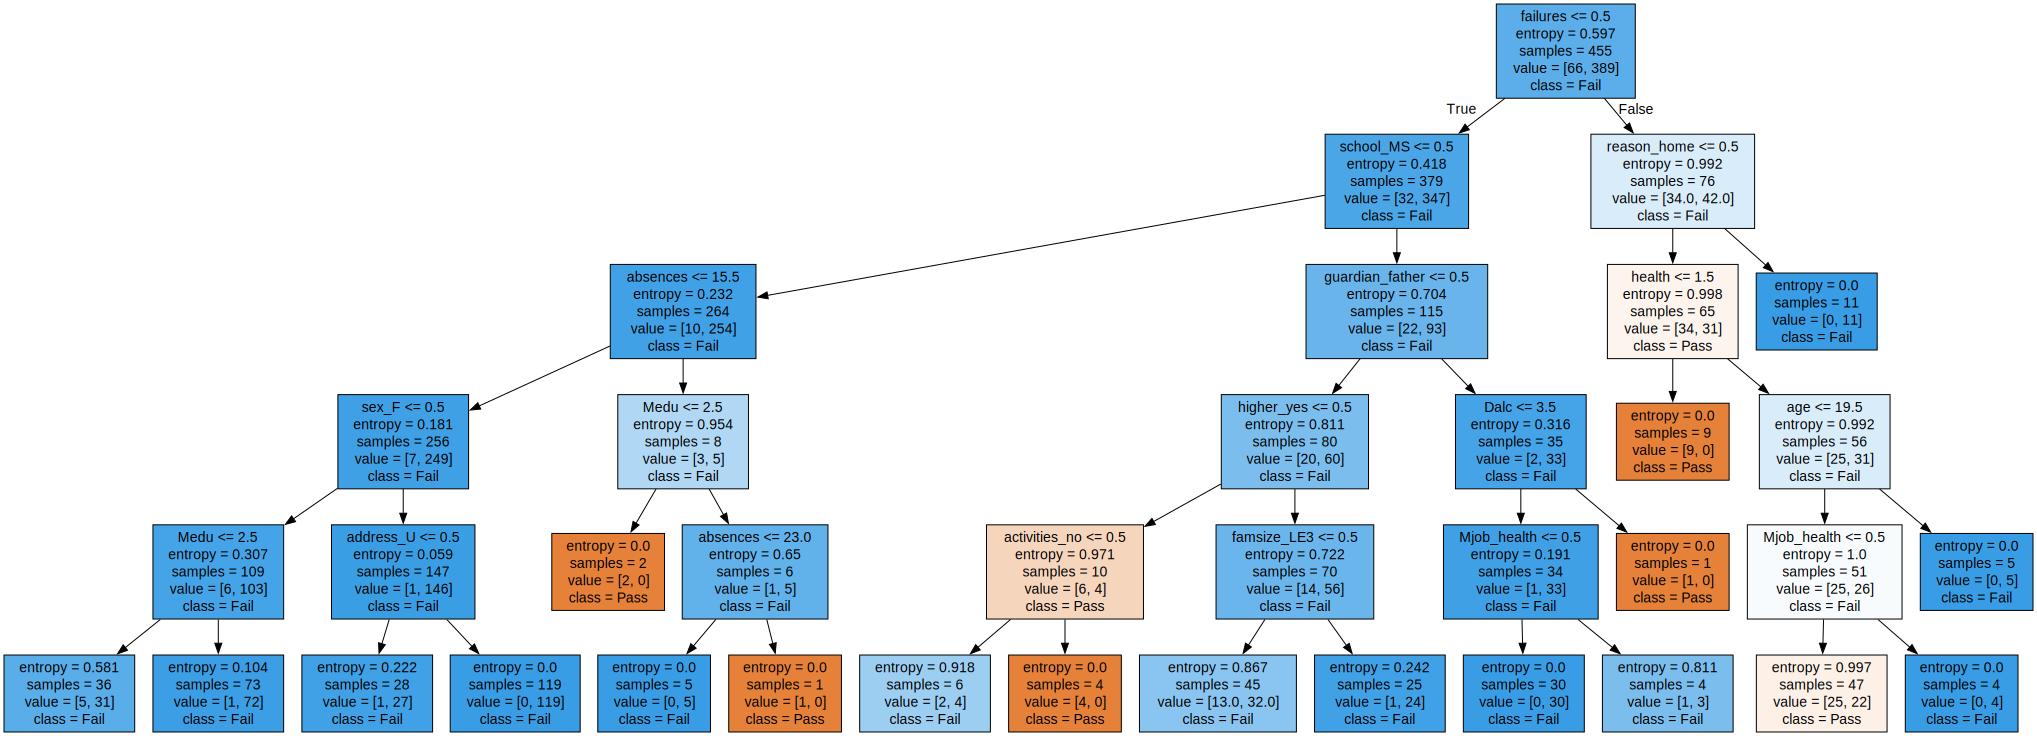

In [12]:
# DOT data
dot_data = tree.export_graphviz(t, out_file = None, 
                                feature_names = list(df_train_features.columns),  
                                class_names = ['Pass', 'Fail'],
                                filled = True)

# Print graph
graph = graphviz.Source(dot_data, format="png") 
graph

## Testing the Model
Now, we'll look at how the model perform on both training set and testing set using performance measures like:
- Accuracy score
- Confusion matrix
- Classification report

## Training set:

In [13]:
train_pred = t.predict(df_train_features)
train_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [14]:
# Checks the probability of identifying each record to each class (Pass/Fail)
t.predict_proba(df_train_features)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.28888889, 0.71111111],
       [0.04      , 0.96      ],
       [0.03571429, 0.96428571],
       [0.28888889, 0.71111111],
       [0.        , 1.        ],
       [0.53191489, 0.46808511],
       [0.01369863, 0.98630137],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.13888889, 0.86111111],
       [0.01369863, 0.98630137],
       [0.13888889, 0.86111111],
       [0.        , 1.        ],
       [0.01369863, 0.98630137],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.03571429, 0.96428571],
       [0.        , 1.        ],
       [0.01369863, 0.98630137],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.04      , 0.96      ],
       [0.01369863, 0.98630137],
       [0.53191489, 0.46808511],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.01369863, 0.98630137],
       [0.

In [15]:
accuracy_score(df_train_labels, train_pred)

0.8989010989010989

In [16]:
confusion_matrix(df_train_labels, train_pred, labels=[0, 1])

array([[ 42,  24],
       [ 22, 367]])

In [17]:
print(classification_report(df_train_labels, train_pred, target_names=['Fail', 'Pass']))

              precision    recall  f1-score   support

        Fail       0.66      0.64      0.65        66
        Pass       0.94      0.94      0.94       389

    accuracy                           0.90       455
   macro avg       0.80      0.79      0.79       455
weighted avg       0.90      0.90      0.90       455



## Interpreting performance on training set:
the model scored a 100% accuracy on training set, now let's test the accuracy on the testing and validation sets to determine whether it learned or is overfitting.

## Testing set:

In [18]:
test_pred = t.predict(df_test_features)
test_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
# Checks the probability of identifying each record to each class (Pass/Fail)
t.predict_proba(df_test_features)

array([[0.53191489, 0.46808511],
       [0.53191489, 0.46808511],
       [0.        , 1.        ],
       [0.01369863, 0.98630137],
       [0.        , 1.        ],
       [0.28888889, 0.71111111],
       [0.33333333, 0.66666667],
       [0.03571429, 0.96428571],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.13888889, 0.86111111],
       [0.53191489, 0.46808511],
       [0.04      , 0.96      ],
       [0.01369863, 0.98630137],
       [0.53191489, 0.46808511],
       [0.        , 1.        ],
       [0.28888889, 0.71111111],
       [0.01369863, 0.98630137],
       [1.        , 0.        ],
       [0.03571429, 0.96428571],
       [0.28888889, 0.71111111],
       [0.03571429, 0.96428571],
       [0.01369863, 0.98630137],
       [0.        , 1.        ],
       [0.28888889, 0.71111111],
       [0.53191489, 0.46808511],
       [0.        , 1.        ],
       [0.53191489, 0.46808511],
       [0.28888889, 0.71111111],
       [0.

In [20]:
accuracy_score(df_test_labels, test_pred)

0.7835051546391752

In [21]:
confusion_matrix(df_test_labels, test_pred, labels=[0, 1])

array([[ 8, 13],
       [ 8, 68]])

In [22]:
print(classification_report(df_test_labels, test_pred, target_names=['Fail', 'Pass']))

              precision    recall  f1-score   support

        Fail       0.50      0.38      0.43        21
        Pass       0.84      0.89      0.87        76

    accuracy                           0.78        97
   macro avg       0.67      0.64      0.65        97
weighted avg       0.77      0.78      0.77        97



## Validating Results

In [23]:
scores = cross_val_score(t, df_valid_features, df_valid_labels, cv=5)

# Show Avg. Score +/- two Standard Deviations away constituting 95% of Scores
print('Accuracy: %.2f (+/- %.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.16)


## Overfitting
the model scored an accuracy of ~80% on both testing and validation sets, but a 100% accuracy on training set, it is clear that the model is memorizing the training data instead of learning. To fix this, let's try and prune the tree.

In [24]:
# Pruning the tree using ccp_alpha (Minimal Cost-Complexity Pruning)
t_pruned = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t_pruned = t_pruned.fit(df_train_features, df_train_labels)

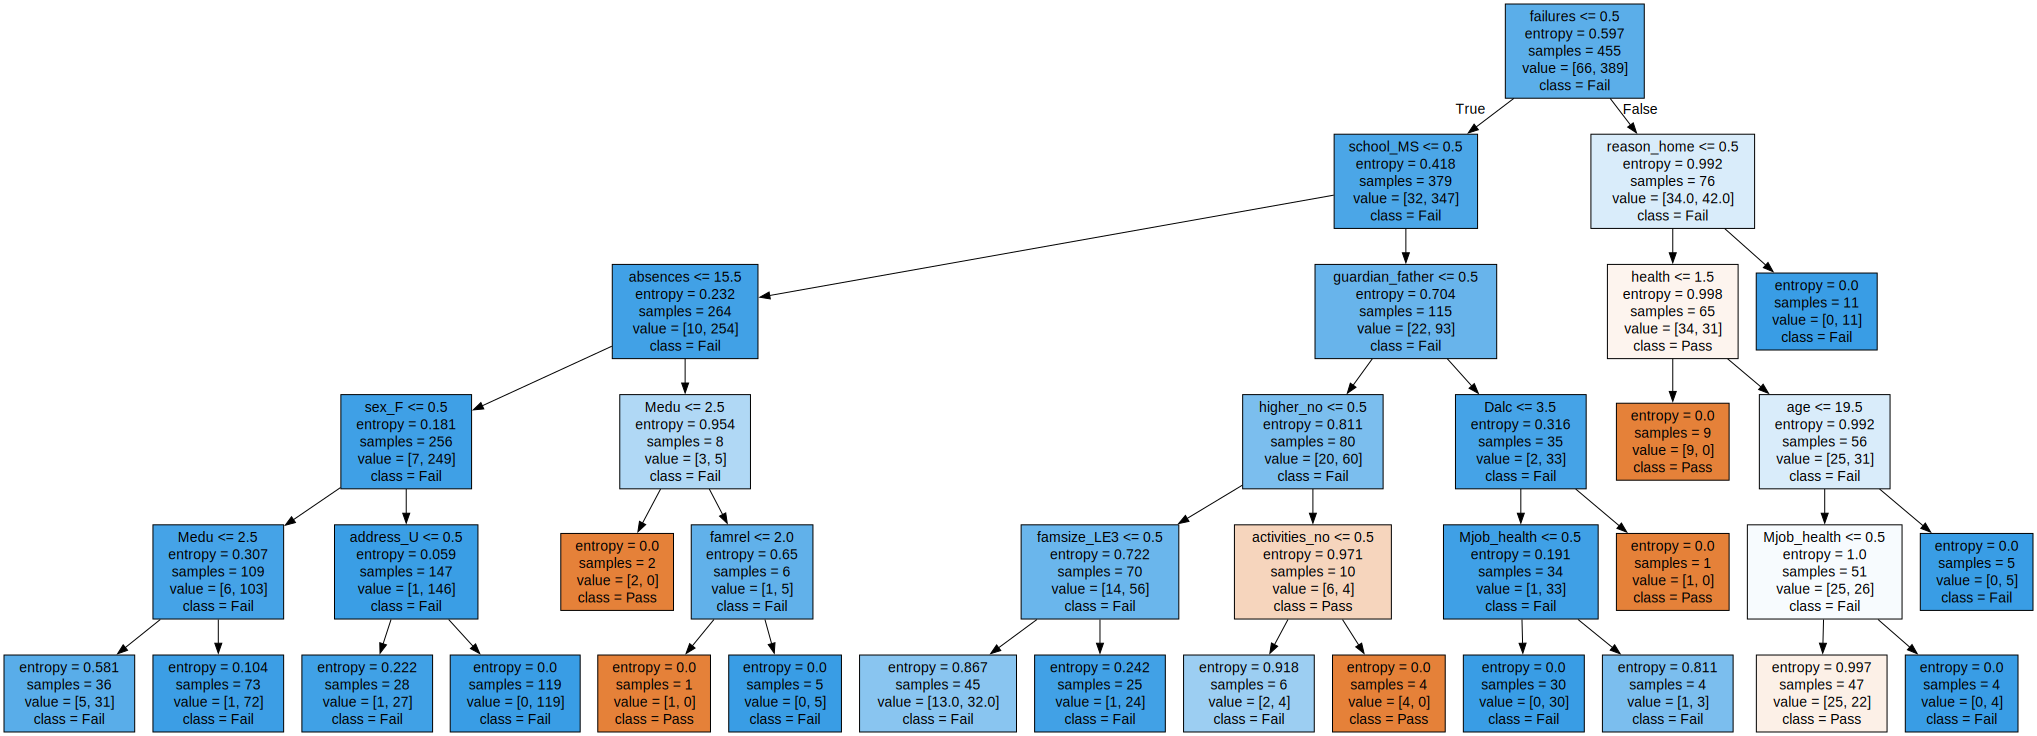

In [25]:
# DOT data
dot_data = tree.export_graphviz(t_pruned, out_file = None, 
                                feature_names = list(df_train_features.columns),  
                                class_names = ['Pass', 'Fail'],
                                filled = True)

# Print graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [26]:
train_pred_pruned = t_pruned.predict(df_train_features)
accuracy_score(df_train_labels, train_pred_pruned)

0.8989010989010989

In [27]:
confusion_matrix(df_train_labels, train_pred_pruned, labels=[0, 1])

array([[ 42,  24],
       [ 22, 367]])

In [28]:
print(classification_report(df_train_labels, train_pred_pruned, target_names=['Fail', 'Pass']))

              precision    recall  f1-score   support

        Fail       0.66      0.64      0.65        66
        Pass       0.94      0.94      0.94       389

    accuracy                           0.90       455
   macro avg       0.80      0.79      0.79       455
weighted avg       0.90      0.90      0.90       455



## Testing set (pruned)

In [29]:
test_pred_pruned = t_pruned.predict(df_test_features)
accuracy_score(df_test_labels, test_pred_pruned)

0.7938144329896907

In [30]:
confusion_matrix(df_test_labels, test_pred_pruned, labels=[0, 1])

array([[ 8, 13],
       [ 7, 69]])

In [31]:
print(classification_report(df_test_labels, test_pred_pruned, target_names=['Fail', 'Pass']))

              precision    recall  f1-score   support

        Fail       0.53      0.38      0.44        21
        Pass       0.84      0.91      0.87        76

    accuracy                           0.79        97
   macro avg       0.69      0.64      0.66        97
weighted avg       0.77      0.79      0.78        97



## Validation set (pruned)

In [32]:
scores = cross_val_score(t_pruned, df_valid_features, df_valid_labels, cv=5)

# Show Avg. Score +/- two Standard Deviations away constituting 95% of Scores
print('Accuracy: %.2f (+/- %.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.15)
